In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [4]:
df_train.head()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240


In [5]:
df_train.shape

(1168, 17)

In [6]:
print("Summary info:")
df_train.info()

Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memor

We have identified missing values in the dataset, and we will proceed to handle them next.

In [7]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


There are three rows with missing values.  Next, we will convert the characters in GarageCars into numbers.

In [8]:
df_train["GarageCars"].unique()

array(['two', 'one', 'three', 'zero', nan, 'four'], dtype=object)

In [9]:
df_train['GarageCars'] = df_train['GarageCars'].replace({
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4
})

df_train['GarageCars'].unique()

C:\Users\ROG\AppData\Local\Temp\ipykernel_26256\880898339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['GarageCars'] = df_train['GarageCars'].replace({


array([ 2.,  1.,  3.,  0., nan,  4.])

In [10]:
print("Summary Statistics:")
print(f"Number different values per column\n{df_train.nunique()}")
df_train.describe()

Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,1.756641,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,0.739063,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


**Insight**:

* **BedroomAbvGr**: The average number of bedrooms above ground is 2.87, with most properties having 2 to 3 bedrooms. The maximum is 8.

* **KitchenAbvGr**: Most properties have 1 kitchen (mean = 1.04). A few have up to 3.

* **TotRmsAbvGrd**: The average number of rooms is 6.5, with most properties having 5 to 7 rooms. The maximum is 14.

* **Fireplaces**: The mean is 0.61, with most properties having no more than 1 fireplace.

* **GarageYrBlt**: The average garage year is 1867, but there’s an issue with a value of -1. Most garages were built between 1957 and 2000.

* **GarageArea**: The mean garage area is 469 sq ft, ranging from 0 to 1418 sq ft.

* **GarageCars**: The mean garage cars is 1.76, ranging from 0 to 4.

* **WoodDeckSF**: The mean deck size is 92 sq ft, though many properties don’t have one.

* **OpenPorchSF**: The average is 46 sq ft, with many properties lacking an open porch.

* **EnclosedPorch**: Most properties have no enclosed porch. The mean is 24 sq ft.

* **3SsnPorch**: The average is 2.78 sq ft, with few properties having a 3-season porch.

* **ScreenPorch**: The average is 16 sq ft. Most properties don't have a screen porch.

* **PoolArea**: The mean is 2.38 sq ft, but most properties have no pool.

* **MiscVal**: Miscellaneous values range from 0 to 15,500, with an average of 39.72.

* **MoSold**: Most sales occur in summer (mean = June).

* **YrSold**: Most properties were sold between 2007 and 2009.

* **SalePrice**: Prices range from $34,900 to $745,000, with an average of $179,164.

In [11]:
# Check for duplicate rows
print("Duplicate rows:")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())

Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,2.0,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,2.0,380,0,40,0,0,0,0,0,4,2006.0,130000


Only two rows of data are duplicated, so the dataset has a very low level of duplication.

### Distribution of Numerical Features

Histograms of numerical features:


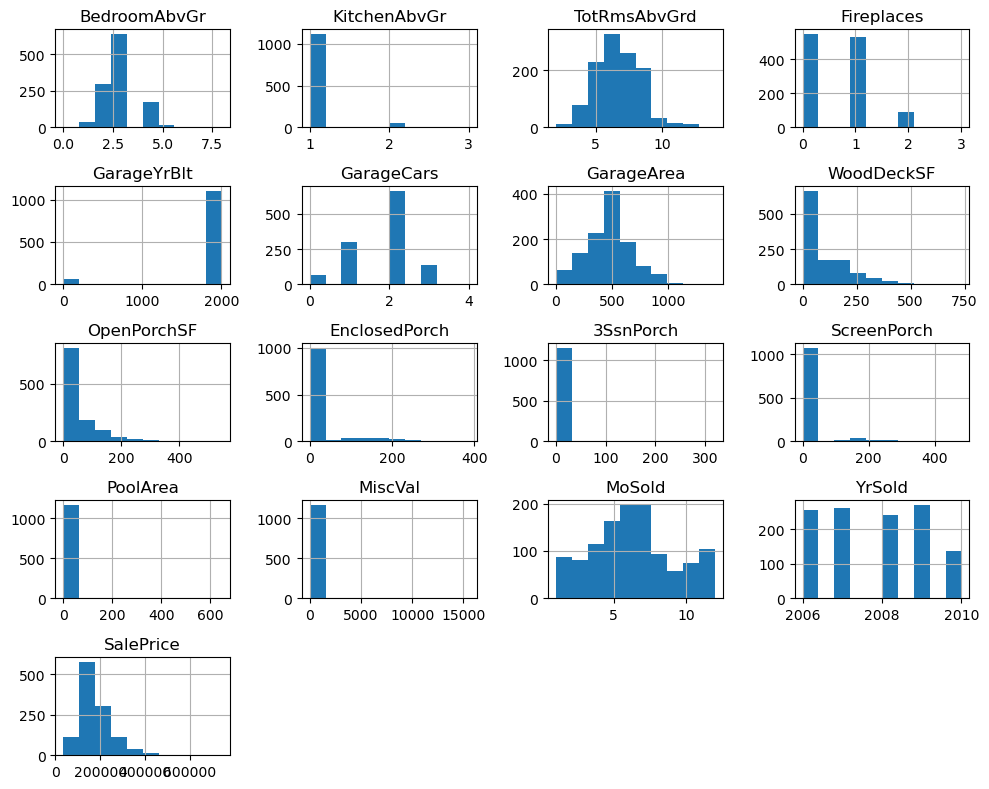

In [12]:
print("Histograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  
plt.show()

### Insight:

- **BedroomAbvGr**:
  - Most houses have 2 to 3 bedrooms. Very few houses have more bedrooms.
  - The distribution is highly concentrated, with a few extreme values (houses with 7 bedrooms).

- **KitchenAbvGr**:
  - Most houses have only 1 kitchen, with a few houses having 2 kitchens.
  - The distribution of kitchen counts shows that the vast majority of houses have a standard one-kitchen structure.

- **TotRmsAbvGrd**:
  - The number of rooms is close to a normal distribution, with 5 to 7 rooms being the most common.
  - The peak of room counts is at 6 rooms, indicating the typical number of rooms in a household.

- **Fireplaces**:
  - Most houses have no fireplaces. About half of the houses have one fireplace, and only a few have two or more fireplaces.

- **GarageYrBlt**:
  - Most houses have garages built in a more recent time period.
  - Some years appear to have missing values(-1).

- **GarageArea**:
  - The distribution of garage area shows that most houses have a garage area between 500 and 600 square feet.
  - A few houses have larger garage areas (over 1000 square feet), which is rare.

- **WoodDeckSF**:
  - Most houses have a relatively small wooden deck, with an area between 0 and 250 square feet.
  - Some houses have decks larger than 500 square feet, showing extreme deviations.

- **OpenPorchSF**:
  - The area of open porches is most commonly between 0 and 100 square feet.
  - Very few houses have larger open porches (over 400 square feet).

- **EnclosedPorch**:
  - Most houses have no enclosed porch, and only a few houses have enclosed porches with small areas.

- **3SsnPorch**:
  - Most houses do not have three-season porches (porches used in spring, summer, and fall).
  - For houses that do have one, the area is concentrated in a small range.

- **ScreenPorch**:
  - Most houses have no screened porch. A small number of houses have screened porches, but the areas are small.

- **PoolArea**:
  - The vast majority of houses do not have a pool. A few houses have pools, but the sizes vary.

- **MiscVal**:
  - Miscellaneous values show that most houses do not have miscellaneous facilities (value of 0). Some houses have significant miscellaneous values, which are rare cases.

- **MoSold**:
  - The house sales months are evenly distributed throughout the year, showing no significant seasonal preference.

- **YrSold**:
  - House sales are concentrated between 2007 and 2010, showing an even distribution of sales over these years.

- **SalePrice**:
  - The sale price distribution is right-skewed, with most houses priced below $200,000.
  - Higher-priced houses are outliers, showing a large variance in house prices.


Box plots to check for outliers:


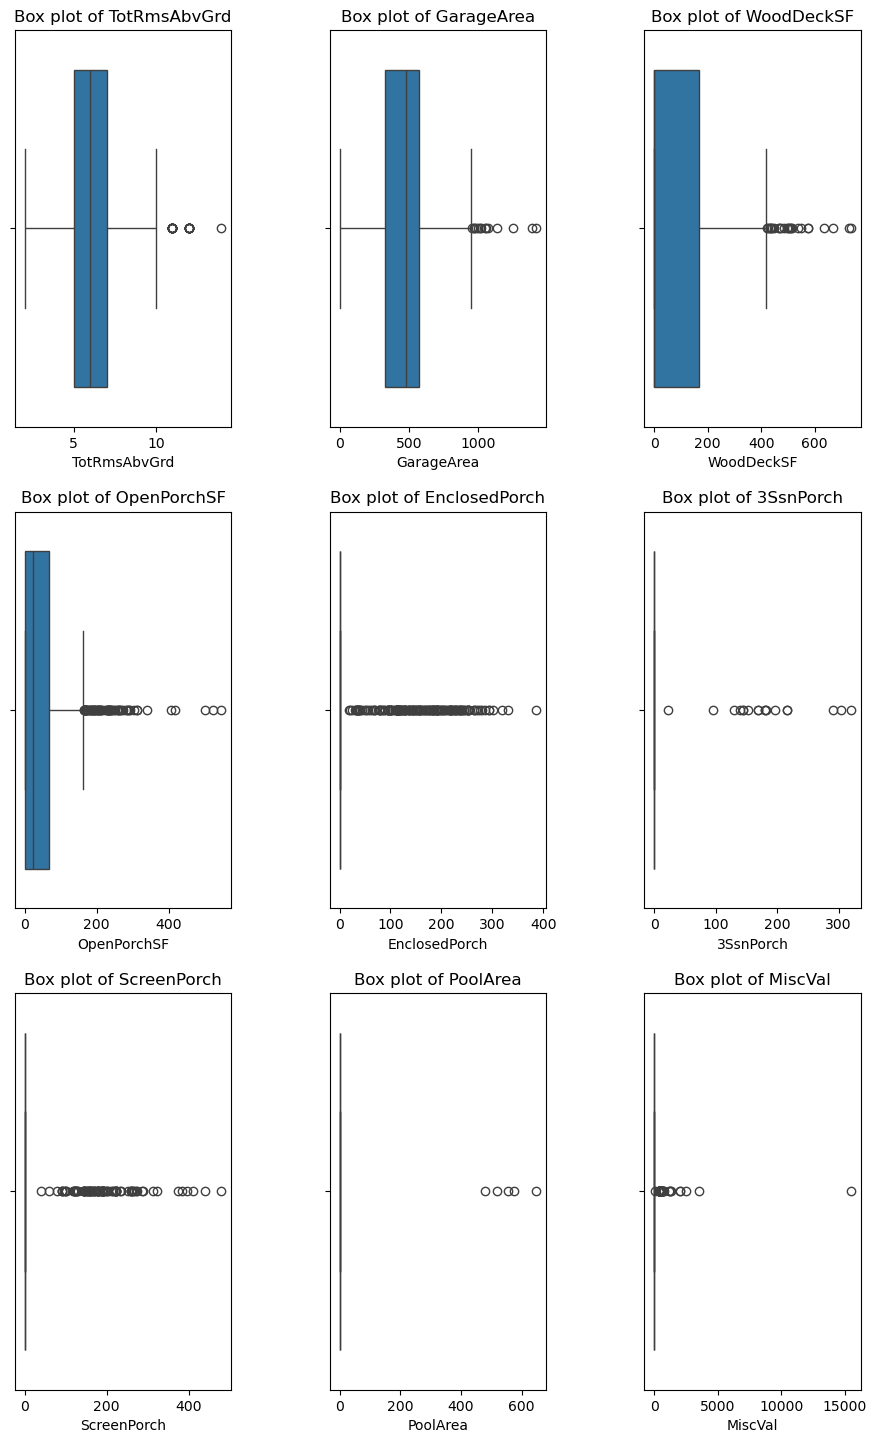

In [13]:
print("Box plots to check for outliers:")
numeric_cols = ["TotRmsAbvGrd", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

# Set up the plot grid
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df_train[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

### Insight:

1. **TotRmsAbvGrd (Total number of rooms above ground)**:
   - The number of rooms is primarily concentrated around 5 to 10, with a few houses having more rooms, extending beyond this range.

2. **GarageArea (Garage area)**:
   - Most garage areas are below 500, with some garages having larger areas, exceeding the main range.

3. **WoodDeckSF (Wood deck area)**:
   - The wood deck area is mostly between 0 and 200, but a few houses have larger decks, with areas above 400.

4. **OpenPorchSF (Open porch area)**:
   - Most houses have an open porch area below 100, with a small number of houses having more spacious porches.

5. **EnclosedPorch (Enclosed porch area)**:
   - Enclosed porch areas are typically smaller than 100, though some houses have areas beyond this range.

6. **3SsnPorch (Three-season porch area)**:
   - Three-season porch areas are mostly 0, with only a few houses having larger porches, exceeding 100 in size.

7. **ScreenPorch (Screen porch area)**:
   - The screen porch area is close to zero in most houses, but some houses stand out with more prominent screen porches.

8. **PoolArea (Pool area)**:
   - Most houses have no pool, though a few have larger pool areas, up to 600.

9. **MiscVal (Miscellaneous value)**:
   - Most houses have a miscellaneous value of 0, but a few houses have significantly higher values, exceeding 5000.



### Correlation Analysis

Correlation matrix:


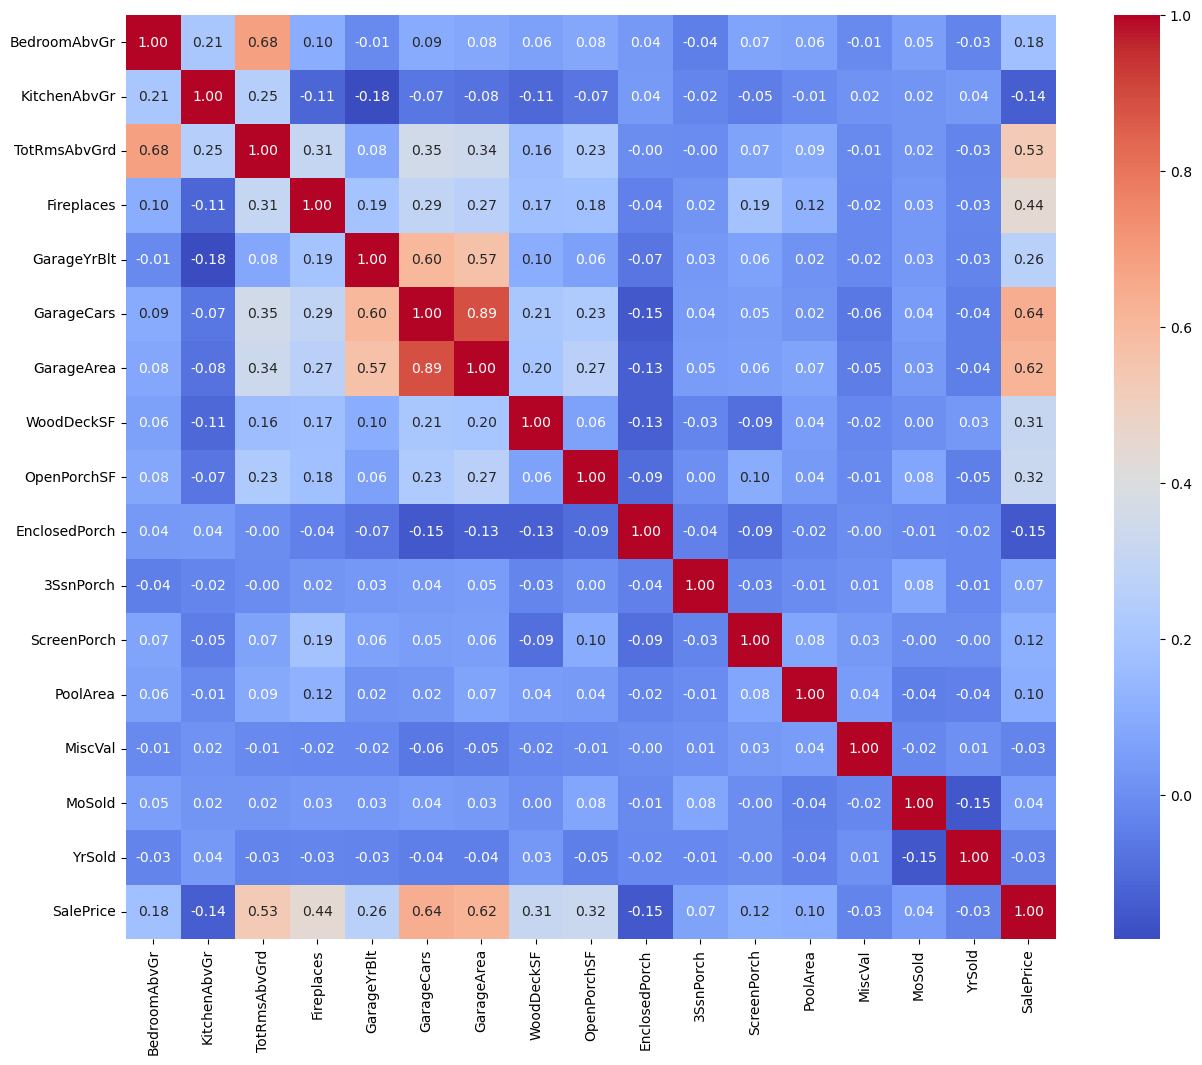

In [14]:
print("Correlation matrix:")
corr_matrix = df_train.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Insight:

1. **GarageCars**:
   - **Positive correlation with GarageArea (0.89)**: As expected, the number of cars a garage can hold is strongly related to the size of the garage.
   - **Positive correlation with SalePrice (0.64)**: Larger garages (more car spaces) are positively associated with higher sale prices, indicating that garage capacity can significantly influence house value.

2. **GarageArea**:
   - **Positive correlation with SalePrice (0.62)**: Homes with larger garage areas tend to have higher sale prices, reflecting the added value of spacious garages.

3. **TotRmsAbvGrd (Total rooms above ground)**:
   - **Positive correlation with SalePrice (0.53)**: Houses with more rooms above ground are likely to sell for higher prices, suggesting that larger homes are more valuable.

4. **Fireplaces**:
   - **Positive correlation with SalePrice (0.44)**: Homes with more fireplaces tend to have higher sale prices, indicating that fireplaces are a desirable feature.

5. **GarageYrBlt (Garage Year Built)**:
   - **Positive correlation with GarageCars (0.60)**: More recently built garages tend to be larger or accommodate more cars, which might be due to modern design preferences.
   - **Positive correlation with SalePrice (0.26)**: More recent garage construction is associated with higher sale prices, which could indicate that newer garages add more value to a home.

6. **WoodDeckSF (Wood deck area)**:
   - **Positive correlation with SalePrice (0.31)**: Larger wood decks are positively associated with higher sale prices, showing that outdoor spaces contribute to home value.

Important correlations with 'Survived':


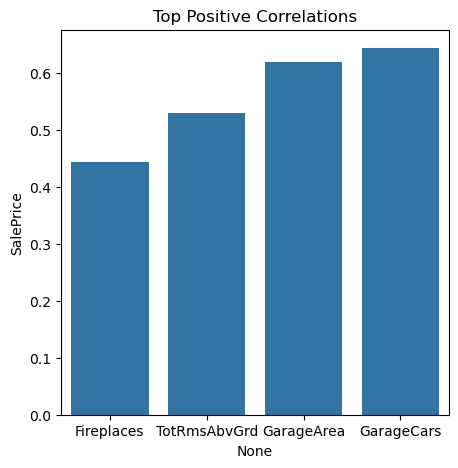

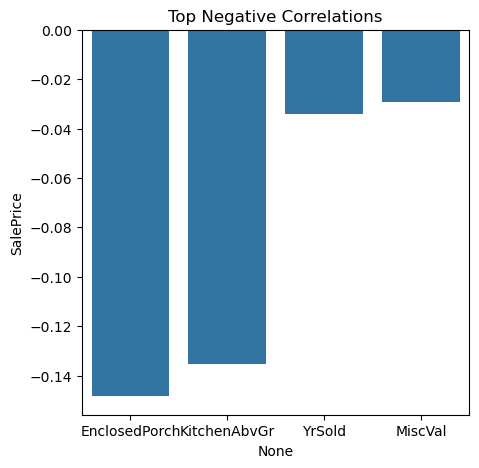

In [15]:
print("Important correlations with 'Survived':")
corrs = df_train.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")
plt.show()

### Compare distribution of train and test data

In [16]:
X_test =  pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')
X_test.shape

(292, 16)

In [17]:
X_test['GarageCars'] = X_test['GarageCars'].replace({
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4
})

X_test['GarageCars'].unique()

C:\Users\ROG\AppData\Local\Temp\ipykernel_26256\1834030694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['GarageCars'] = X_test['GarageCars'].replace({


array([3, 2, 1, 0, 4], dtype=int64)

In [18]:
X_test.isnull().sum()

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

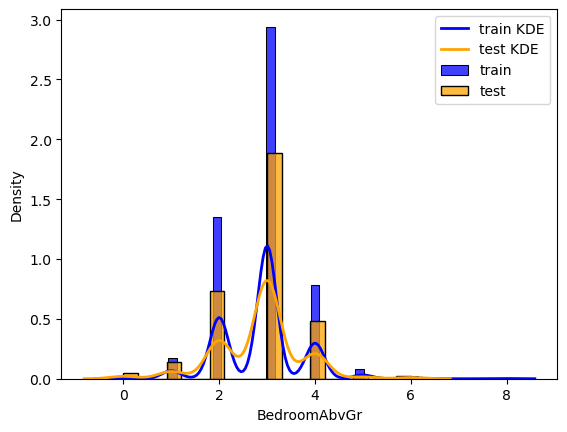

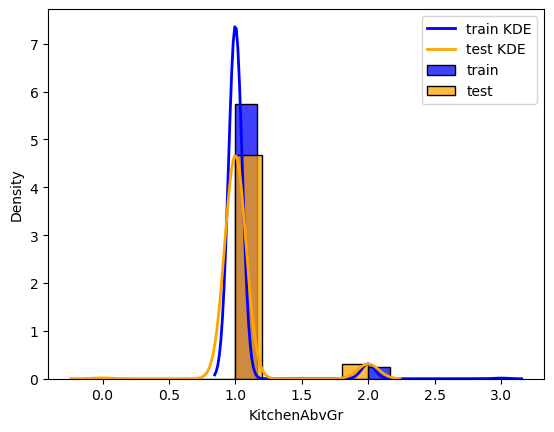

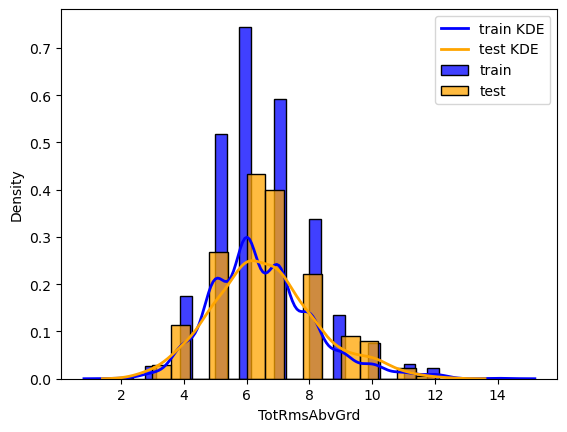

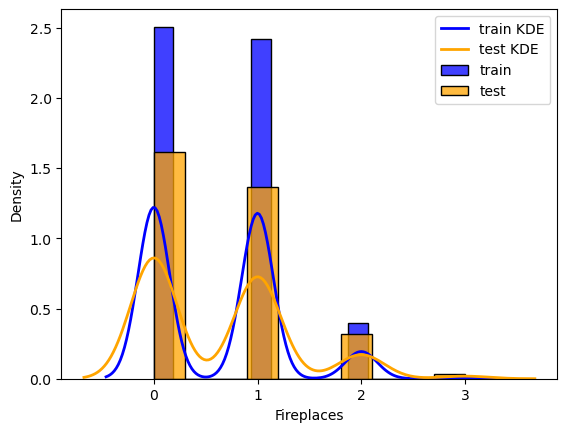

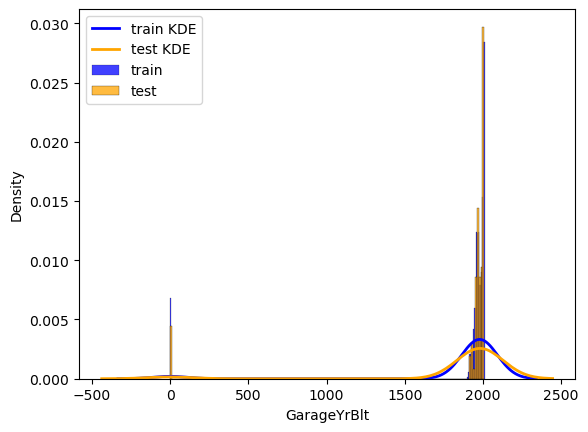

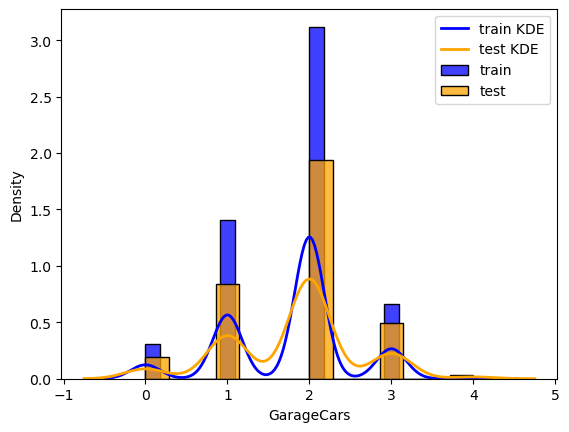

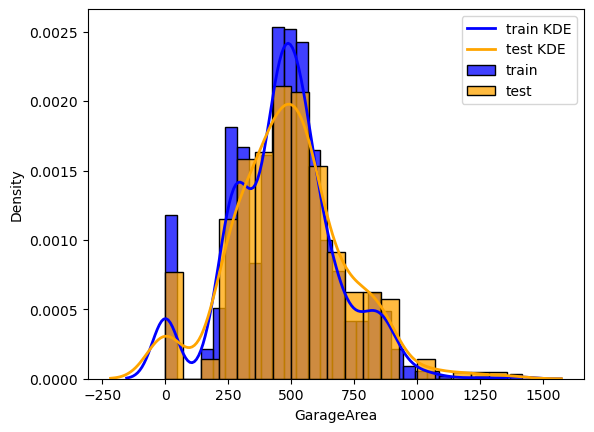

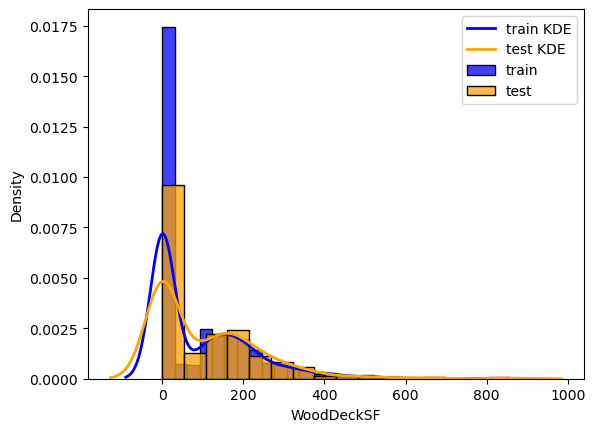

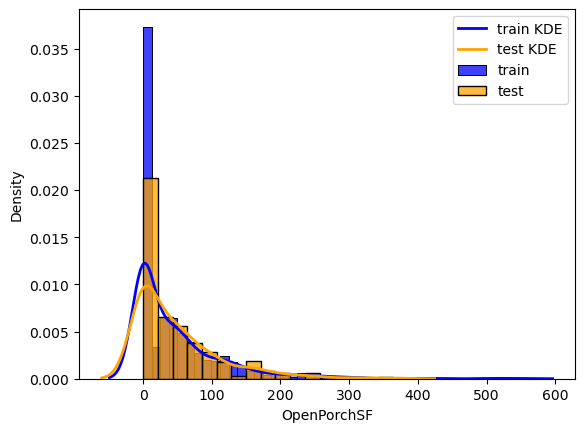

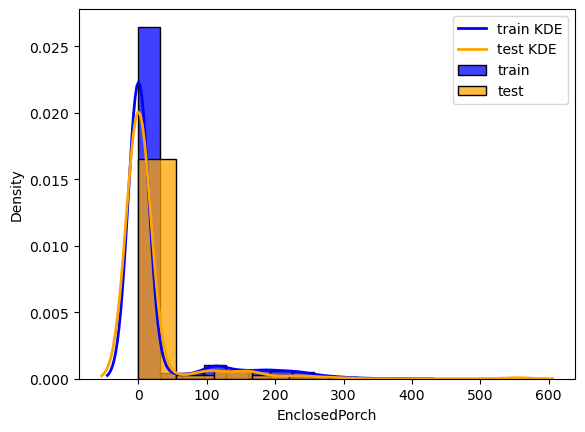

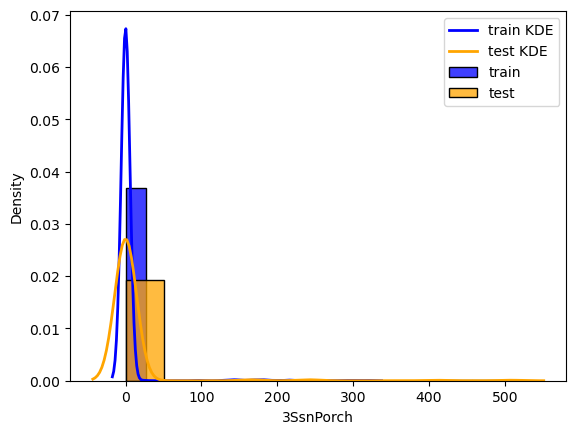

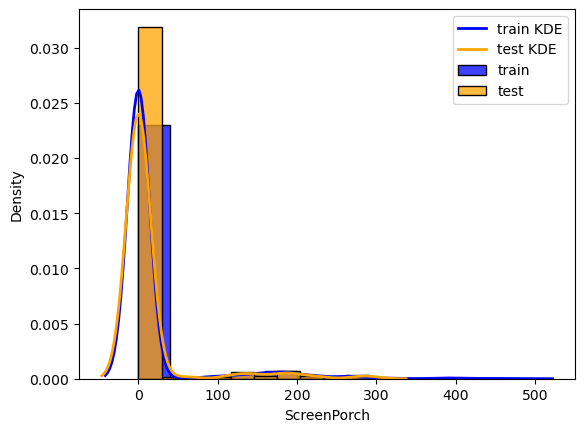

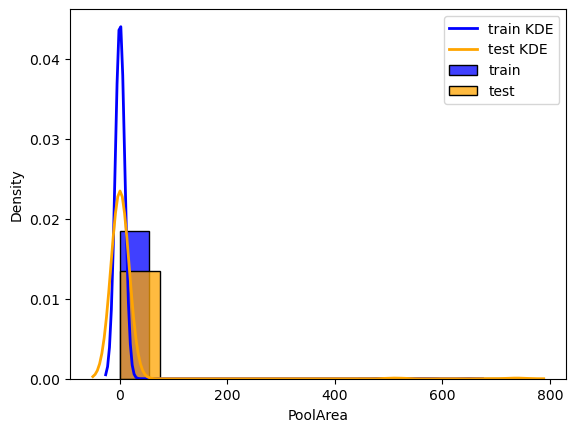

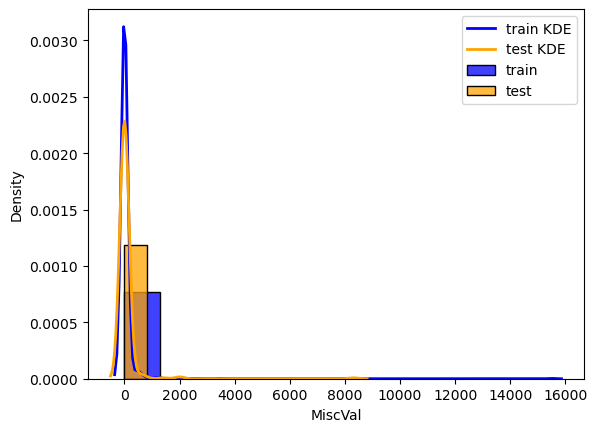

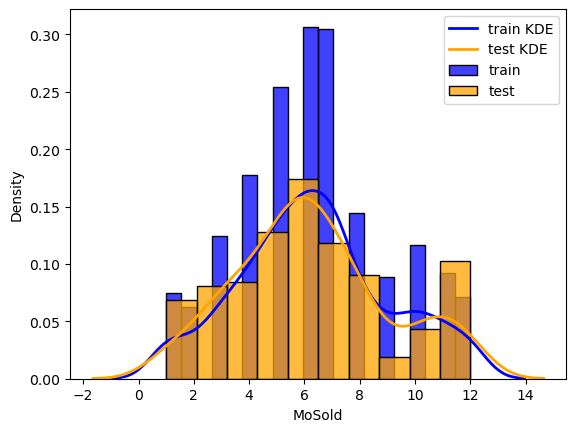

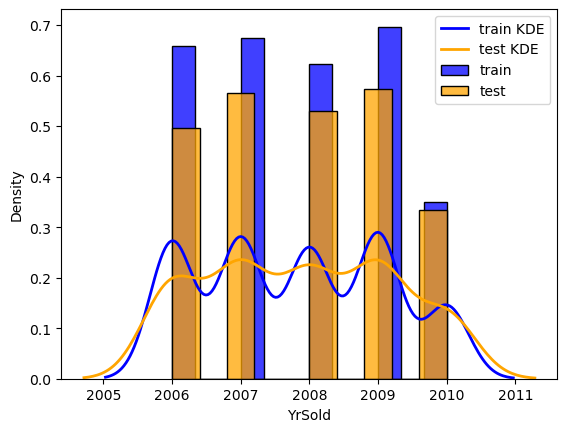

In [19]:
for col in X_test.columns:
    plt.figure()
    
    sns.histplot(df_train[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
    
    sns.kdeplot(df_train[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
    
    plt.legend()
    plt.show()

By observation, the samples in the train and test datasets are very similar.